# Análisis de sesiones

In [1]:
import pandas as pd
import random

In [18]:
#Sesion list
#session_list = ['R2qIgtMfWsY','Mi9PnuVPJ4c','csVi8HnKwFc','YNmrdN4WEeI']
session_list = ['LzEsda8eijo']

In [19]:
#Joining session
session_df = pd.DataFrame(columns = ['start','duration','text','cleaned_text'])
for file in session_list:
    #Read the csv file
    df = pd.read_parquet(f'corpus_cleaned/{file}.parquet')
    #Print the first 5 rows
    session_df = pd.concat([session_df,df],ignore_index=True)
#Entire session
session_df.head()

/var/folders/k5/4l2xn2f17r7_xq_sxwbj2tbw0000gn/T/ipykernel_11259/3146036897.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  session_df = pd.concat([session_df,df],ignore_index=True)


,start,duration,text,cleaned_text
0,2.480,7.199,[Música],música
1,7.399,4.801,elemento básico es esa firma si no,elemento básico firma si
2,9.679,4.561,existe la firma el documento No nació a,existe firma documento nació
3,12.200,4.120,la vida jurídica no existió,vida jurídica existió
4,14.240,4.320,consentimiento de la persona que fue,consentimiento persona


In [20]:
entire_corpus = " ".join(session_df['cleaned_text'].tolist())
#Removiendo palabras no útiles
entire_corpus = entire_corpus.replace("eh", "")
entire_corpus[:1000]

'música elemento básico firma si existe firma documento nació vida jurídica existió consentimiento persona requerido patrocinado cuanto  elemento indicando honorable juzgador representación considera dan elementos necesarios tal virtud solicita respetuosamente persona dicte falta virtud dan elementos comisión hecho delictivo cuanto patrocinado consigna insertó ningún momento vino dijo firmas anteriores hojas adhesiones ocho hojas adhesiones  consigna contenido simplemente realizó auténtica firma resto asunto desconoce seguramente ministerio público realizando investigación fondo relacionado asunto entonces patrocinado solicito respetuosamente dicte falta mérito cuanto extremo ordene forma inmediata libertad conformidad efectuado artículo 13 constitución política república guatemala artículo 272 código procesal penal bien después haber escuchado todas partes res siguiente caso recordar objeto audiencia primera declaración proceso penal establecer si existe posibilidad comisión hecho del

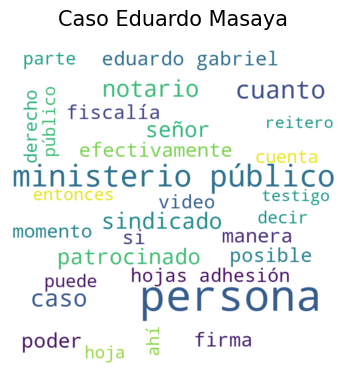

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear la WordCloud utilizando la función de colores personalizada
wordcloud = WordCloud(max_words=30, background_color='white', width=800, height=800).generate(entire_corpus)

# Crear la figura
plt.figure(figsize=(10, 5))

# Mostrar la WordCloud sin márgenes
plt.imshow(wordcloud, interpolation='bilinear')

# Eliminar los ejes
plt.axis('off')

# Agregar un título con mayor separación
plt.title("Caso Eduardo Masaya", fontsize=15, pad=10)

# Ajustar el margen superior e inferior
plt.subplots_adjust(top=0.75, bottom=0.1, left=0, right=1, hspace=0, wspace=0)

# Mostrar la WordCloud
plt.show()


In [13]:
# Definir una función personalizada para cambiar el color de las palabras
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Lista de colores (puedes personalizar estos colores)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    #colors = ['#D49BA3', '#5D576B', '#F2E8D7', '#6C9A8B', '#F28C7F']
    #colors = ["#FFDF27","#66AC1F","#E5ECE9","#F40957","#FF5E93"]
    return random.choice(colors)